# PCA: Principle Component Analysis

In [4]:
from sklearn.datasets import load_digits

from matplotlib import pyplot as plt 

import pandas as pd 
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 

# Load Data

In [2]:
dataset = load_digits()

# Visualize

<Figure size 640x480 with 0 Axes>

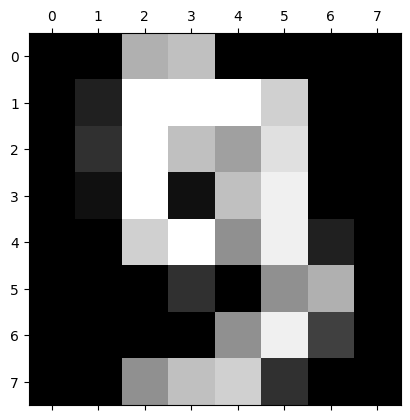

In [3]:
plt.gray()
plt.matshow(dataset.data[9].reshape(8,8))

# Create a DataFrame

In [5]:
df = pd.DataFrame(dataset.data, columns= dataset.feature_names)

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# Split the data into input and output

In [6]:
X = df 
y = dataset.target

# Scale the data

In [7]:
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

# Split the Data Into Train and Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [9]:
X_train.shape

(1437, 64)

# 1. Option: Create the PCA using Percentage

In [10]:
pca = PCA(0.95)  # 95% of information will be retained

X_pca = pca.fit_transform(X)

In [12]:
len(pca.explained_variance_ratio_)

29

In [13]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [14]:
# Count of Components
pca.n_components_

29

# Normally after scalling --> PCA .-> Train and Test  split 

In [16]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size= 0.2)

# Build and Train the model

In [17]:
model = LogisticRegression()
model.fit(X_train_pca, y_train_pca)

c:\Python\Python31172\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model.score(X_test_pca ,y_test_pca)

0.9527777777777777

# 2. Option: PCA using count of components

In [23]:
pca = PCA(n_components= 5)

X_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415])

In [24]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size= 0.2)

In [25]:
model = LogisticRegression()
model.fit(X_train_pca, y_train_pca)

c:\Python\Python31172\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.score(X_test_pca ,y_test_pca)

0.8583333333333333